<a href="https://colab.research.google.com/github/s-ajaykumar/Deep_Learning_Projects/blob/main/Image_Classification_Using_CNN(CifarDataSet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# importing libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# importing data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# data exploration
print(X_train.shape)
print(y_train.shape)
print(y_train[:5])
print(X_test.shape)
print(y_test.shape)

# Converting 2d array into 1d array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print(y_train[:5])
print(y_test[:5])


(50000, 32, 32, 3)
(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]
(10000, 32, 32, 3)
(10000, 1)
[6 9 9 4 1]
[3 8 8 0 6]


Text(0.5, 0, '[6]')

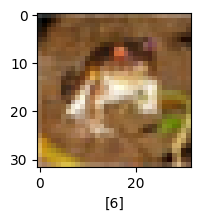

In [81]:
plt.figure(figsize = (10,2))
plt.imshow(X_train[0])
plt.xlabel(y_train[0])

In [101]:
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3) ),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    # network layer
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu',),
    layers.Dense(1000, activation = 'softmax',)
])

In [102]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [105]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 129s 83ms/step - loss: 1.3057 - Accuracy: 0.5384
Epoch 2/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.1146 - Accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.9590 - Accuracy: 0.6704
Epoch 4/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.8094 - Accuracy: 0.7230
Epoch 5/10
1563/1563 [==============================] - 129s 82ms/step - loss: 0.6644 - Accuracy: 0.7773
Epoch 6/10
1563/1563 [==============================] - 129s 82ms/step - loss: 0.5326 - Accuracy: 0.8209
Epoch 7/10
1563/1563 [==============================] - 126s 80ms/step - loss: 0.4364 - Accuracy: 0.8585
Epoch 8/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.3797 - Accuracy: 0.8804
Epoch 9/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.3492 - Accuracy: 0.8922
Epoch 10/10
1563/1563 [==============================] 

In [107]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 2.7166 - Accuracy: 0.6018


[2.7165989875793457, 0.6018000245094299]

In [113]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 94ms/step


array([[1.7315922e-03, 4.7481162e-03, 3.1724009e-03, ..., 2.3079103e-29,
        1.3714879e-28, 1.2396135e-27],
       [6.7604183e-06, 3.1877786e-02, 1.7737845e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0800550e-01, 2.2319221e-01, 1.3743527e-01, ..., 2.0046769e-19,
        1.0995415e-19, 2.3924375e-20],
       [9.9875462e-01, 5.5362569e-05, 6.0956327e-06, ..., 1.2770982e-33,
        5.6673485e-34, 2.3632492e-35],
       [3.8434846e-12, 6.6182363e-12, 4.0533771e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [114]:
y_pred = [np.argmax(x) for x in output]
y_pred

[3, 8, 9, 0, 4]

In [115]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)